# Working with DataFrames & Series - indexes

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,Ankara ekspresi,1952
1,"Ans Vaterland, ans teure",1915
2,Miss Mohini,2002
3,La vera madre,1999
4,O Amerikanos,1993


In [7]:
%%time
cast = pd.read_csv('data/cast.csv')
cast.head()

Wall time: 8.17 s


,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [14]:
len(cast)

3442902

In [13]:
# When I do something like this I am asking the question 3.4 million times
%time
cast[cast.title == 'Star Wars']

Wall time: 0 ns


,title,year,name,type,character,n
59909,Star Wars,1977,David Ankrum,actor,Red Two,NaN
82411,Star Wars,1977,Graham Ashley,actor,Gold Five,23.0
91760,Star Wars,1977,Mark Anthony Austin,actor,Boba Fett (special edition),NaN
110035,Star Wars,1977,Kenny Baker,actor,R2-D2,7.0
145346,Star Wars,1977,Scott Beach,actor,Stormtrooper,NaN
...,...,...,...,...,...,...
3028315,Star Wars,1977,Mandy Morton,actress,Swilla Corey,NaN
3185175,Star Wars,1977,Pam Rose,actress,Leesub Sirln,NaN
3252538,Star Wars,1977,Erica Simmons,actress,Tawss Khaa,NaN
3277739,Star Wars,1977,Angela Staines,actress,Senni Tonnika,NaN


In [17]:
# iloc vs loc
cast.loc[3]

title        Secret in Their Eyes
year                         2015
name                      $hutter
type                        actor
character         2002 Dodger Fan
n                             NaN
Name: 3, dtype: object

In [18]:
c = cast.set_index('title')

In [20]:
c.loc['Star Wars']

,year,name,type,character,n
title,,,,,
Star Wars,1977,David Ankrum,actor,Red Two,NaN
Star Wars,1977,Graham Ashley,actor,Gold Five,23.0
Star Wars,1977,Mark Anthony Austin,actor,Boba Fett (special edition),NaN
Star Wars,1977,Kenny Baker,actor,R2-D2,7.0
Star Wars,1977,Scott Beach,actor,Stormtrooper,NaN
...,...,...,...,...,...
Star Wars,1977,Mandy Morton,actress,Swilla Corey,NaN
Star Wars,1977,Pam Rose,actress,Leesub Sirln,NaN
Star Wars,1977,Erica Simmons,actress,Tawss Khaa,NaN


In [23]:
# indexes are better if they are ordered
# index takes time to build but after that it operates much faster
# when I do this Python uses a different method of finding -does not do it
# 3.7 million times
c = cast.set_index('title').sort_index()
c.head()

,year,name,type,character,n
title,,,,,
#211,2018,Liza Mircheva,actress,Elizabeth Grey,NaN
#211,2018,Rachel O'Meara,actress,Vice Principal,NaN
#211,2018,Amanda Cerny,actress,Sarah,9.0
#211,2018,Sophie Skelton,actress,Lisa MacAvoy,2.0
#211,2018,Mackenzie Evans,actress,Girl,NaN


In [25]:

c.loc['Star Wars']

,year,name,type,character,n
title,,,,,
Star Wars,1977,Salo Gardner,actor,Cantina Patron,NaN
Star Wars,1977,Harold Weed,actor,Melas,NaN
Star Wars,1977,Harry Fielder,actor,Death Star Trooper,NaN
Star Wars,1977,Roy Straite,actor,Cantina Patron,NaN
Star Wars,1977,Doug Beswick,actor,Cantina Alien,NaN
...,...,...,...,...,...
Star Wars,1977,Melissa Kurtz,actress,Jawa,NaN
Star Wars,1977,Tiffany Hillkurtz,actress,Jawa,NaN
Star Wars,1977,Alex McCrindle,actor,General Dodonna,14.0


In [26]:
c.loc['The Wizard of Oz']

,year,name,type,character,n
title,,,,,
The Wizard of Oz,1939,Priscilla Montgomery,actress,Munchkin Child,NaN
The Wizard of Oz,1939,Victor Wetter,actor,Munchkin Army Captain,NaN
The Wizard of Oz,1939,'Little Billy' Rhodes,actor,Munchkin Barrister,NaN
The Wizard of Oz,1939,Billie Burke,actress,Glinda,6.0
The Wizard of Oz,1939,William H. O'Docharty,actor,Munchkin on Carriage,NaN
...,...,...,...,...,...
The Wizard of Oz,1925,Larry Semon,actor,Scarecrow,13.0
The Wizard of Oz,1925,Frederick Ko Vert,actor,Phantom of the Basket,12.0
The Wizard of Oz,1939,Ken Darby,actor,Munchkinland Mayor,NaN


In [27]:
c = cast.set_index(['title', 'year']).sort_index()
c.head()


name     type       character    n
title year                                               
#211  2018     Sapir Azulay  actress          Jacobs  NaN
      2018           Bleona  actress       Christine  NaN
      2018     Amanda Cerny  actress           Sarah  9.0
      2018  Mackenzie Evans  actress            Girl  NaN
      2018    Liza Mircheva  actress  Elizabeth Grey  NaN

In [33]:
c.loc['The Wizard of Oz', 1925].reset_index('year')

,year,name,type,character,n
title,,,,,
The Wizard of Oz,1925,Frank Alexander,actor,Uncle Henry,10.0
The Wizard of Oz,1925,Frank Alexander,actor,Prince of Whales,10.0
The Wizard of Oz,1925,Spencer Bell,actor,Cowardly Lion,NaN
The Wizard of Oz,1925,Spencer Bell,actor,Rastus,NaN
The Wizard of Oz,1925,Spencer Bell,actor,Snowball (as G. Howe Black),NaN
The Wizard of Oz,1925,Chester Conklin,actor,Undetermined Role,NaN
The Wizard of Oz,1925,William Dinus,actor,Undetermined Role,9.0
The Wizard of Oz,1925,Oliver Hardy,actor,Woodsman,7.0
The Wizard of Oz,1925,Oliver Hardy,actor,Knight of the Garter,7.0


In [34]:
c.loc['The Wizard of Oz', 1925].reset_index(['title', 'year'])

,title,year,name,type,character,n
0,The Wizard of Oz,1925,Frank Alexander,actor,Uncle Henry,10.0
1,The Wizard of Oz,1925,Frank Alexander,actor,Prince of Whales,10.0
2,The Wizard of Oz,1925,Spencer Bell,actor,Cowardly Lion,NaN
3,The Wizard of Oz,1925,Spencer Bell,actor,Rastus,NaN
4,The Wizard of Oz,1925,Spencer Bell,actor,Snowball (as G. Howe Black),NaN
5,The Wizard of Oz,1925,Chester Conklin,actor,Undetermined Role,NaN
6,The Wizard of Oz,1925,William Dinus,actor,Undetermined Role,9.0
7,The Wizard of Oz,1925,Oliver Hardy,actor,Woodsman,7.0
8,The Wizard of Oz,1925,Oliver Hardy,actor,Knight of the Garter,7.0
9,The Wizard of Oz,1925,Oliver Hardy,actor,Farmhand,7.0


In [62]:
# groupby


In [36]:
# have to use an aggregator, first, last, sum, size, etc
cast = pd.read_csv('data/cast.csv')
c = cast[cast.name == 'Natalie Portman'] 
len(c)

41

In [43]:
# spits out a series --> whatever you group on becomes the index
c.sort_values(by="year").groupby(['year', 'title', 'character']).size().head()

year  title                     character       
1995  Heat                      Lauren Gustafson    1
1996  Beautiful Girls           Marty               1
      Everyone Says I Love You  Laura               1
      Mars Attacks!             Taffy Dale          1
1999  Anywhere But Here         Ann August          1
dtype: int64

In [45]:
c.sort_values(by="year").groupby('year',).size()

year
1995    1
1996    3
1999    3
2000    1
2001    1
2002    1
2003    1
2004    2
2005    4
2006    2
2007    3
2008    1
2009    2
2010    4
2011    3
2013    1
2015    4
2016    3
2017    1
dtype: int64

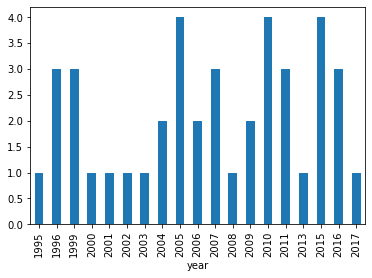

In [48]:
c.sort_values(by="year").groupby('year',).size().plot(kind='bar');

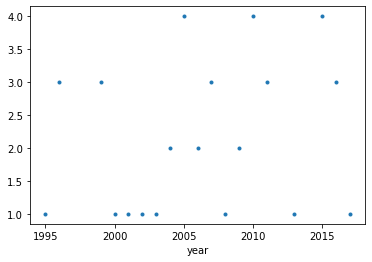

In [51]:
c.sort_values(by="year").groupby('year',).size().plot(style='.');

In [52]:
c.sort_values(by="year").groupby('year',).n.min()

year
1995    14.0
1996     9.0
1999     2.0
2000     1.0
2001    20.0
2002     2.0
2003     7.0
2004     3.0
2005     1.0
2006     2.0
2007     2.0
2008     1.0
2009     1.0
2010     1.0
2011     1.0
2013     2.0
2015     1.0
2016     1.0
2017     4.0
Name: n, dtype: float64

In [59]:
# can group by an expression (may be better to group on column name)
c = cast
c.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


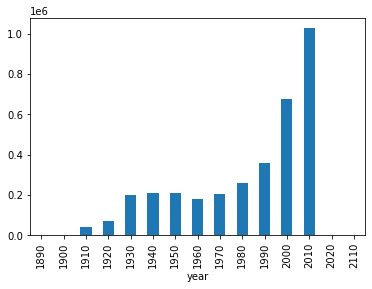

In [57]:
c.groupby(c. year // 10 * 10).size().plot(kind='bar');

In [60]:
# Columns are also an index --> unstack and stack for indexing on column
# and unstack(0)
c.groupby([c. year // 10 * 10, 'type']).size()

year  type   
1890  actor           2
      actress         1
1900  actor          54
      actress        16
1910  actor       27396
      actress     15733
1920  actor       48112
      actress     23826
1930  actor      149272
      actress     49298
1940  actor      159799
      actress     50871
1950  actor      153559
      actress     56331
1960  actor      128132
      actress     54484
1970  actor      142015
      actress     60977
1980  actor      177064
      actress     80619
1990  actor      245713
      actress    115505
2000  actor      440810
      actress    235217
2010  actor      645548
      actress    382288
2020  actor         134
      actress       123
2110  actor           2
      actress         1
dtype: int64

In [62]:
c.groupby([c. year // 10 * 10, 'type']).size().unstack().head()

type,actor,actress
year,,
1890,2,1
1900,54,16
1910,27396,15733
1920,48112,23826
1930,149272,49298


In [64]:
unstacked =  c.groupby([c. year // 10 * 10, 'type']).size().unstack()
unstacked['actor'] / unstacked['actress']

year
1890    2.000000
1900    3.375000
1910    1.741308
1920    2.019307
1930    3.027952
1940    3.141259
1950    2.726012
1960    2.351736
1970    2.328993
1980    2.196306
1990    2.127293
2000    1.874057
2010    1.688643
2020    1.089431
2110    2.000000
dtype: float64

<AxesSubplot:xlabel='year'>

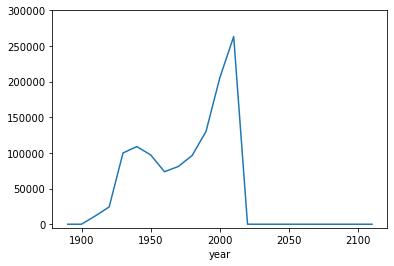

In [77]:
# .fillna(value), i.e. 0
# set ylim 

(unstacked['actor'] - unstacked['actress']).plot(ylim=[-5000,300000])

In [79]:
release = pd.read_csv(
    'data/release_dates.csv',
    parse_dates=['date'],
    infer_datetime_format=True,
)
release.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


In [84]:
# dayofweek, dayofyear, 
r = release
r['date'].dt.dayofyear

0         166
1         285
2          29
3         248
4          21
         ... 
443481    119
443482    154
443483    154
443484    168
443485    175
Name: date, Length: 443486, dtype: int64

In [85]:
# merge --> works easily if you have two columns of the 
# same name (with the same data)
c = cast[cast.name == 'Tom Hanks']
dates = c.merge(r)
dates.head()

,title,year,name,type,character,n,country,date
0,A Hologram for the King,2016,Tom Hanks,actor,Alan,1.0,Germany,2016-04-28
1,A Hologram for the King,2016,Tom Hanks,actor,Alan,1.0,Portugal,2016-05-05
2,A Hologram for the King,2016,Tom Hanks,actor,Alan,1.0,Russia,2016-05-12
3,A Hologram for the King,2016,Tom Hanks,actor,Alan,1.0,Romania,2016-05-13
4,A Hologram for the King,2016,Tom Hanks,actor,Alan,1.0,Sweden,2016-05-13


In [88]:
self_merge = c.merge(cast, on=['title', 'year'])

In [90]:
self_merge[self_merge.n_y == 2]

,title,year,name_x,type_x,character_x,n_x,name_y,type_y,character_y,n_y
8,A Hologram for the King,2016,Tom Hanks,actor,Alan,1.0,Alexander (X) Black,actor,Yousef,2.0
107,A League of Their Own,1992,Tom Hanks,actor,Jimmy Dugan,1.0,Geena Davis,actress,Dottie Hinson,2.0
242,Angels & Demons,2009,Tom Hanks,actor,Robert Langdon,1.0,Ewan McGregor,actor,Camerlengo Patrick McKenna,2.0
405,Apollo 13,1995,Tom Hanks,actor,Jim Lovell,1.0,Bill Paxton,actor,Fred Haise,2.0
504,Bachelor Party,1984,Tom Hanks,actor,Rick Gassko,1.0,Tawny Kitaen,actress,Debbie Thompson,2.0
...,...,...,...,...,...,...,...,...,...,...
5171,Toy Story 2,1999,Tom Hanks,actor,Woody,1.0,Tim Allen,actor,Buzz Lightyear,2.0
5211,Toy Story 3,2010,Tom Hanks,actor,Woody,1.0,Tim Allen,actor,Buzz Lightyear,2.0
5324,Turner & Hooch,1989,Tom Hanks,actor,Scott Turner,1.0,Mare Winningham,actress,Emily Carson,2.0
5327,Volunteers,1985,Tom Hanks,actor,Lawrence Bourne III,1.0,John Candy,actor,Tom Tuttle from Tacoma,2.0


# Problems

#### 1. Plot the number of films released each decade over time 

#### 2. How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 2000's?

#### 3. In the 2000's decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 4?

#### 4. Plot the fraction of actor roles relative to total roles over time, hint you may need to adjust the ylim to get a meaningful plot 

#### 5. Plot the fraction of supporting roles (n = 2) for actors over time

#### 6. Plot the fraction of roles n = 1,2, or 3 over time. Each should be a separate line

#### 7. When are Tom Cruise movies typically released (month)? 